# Track Evaluation

In [158]:
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from functools import partial
from utils_plot import make_cmp_plot

device = "cuda" if torch.cuda.is_available() else "cpu"

## Read Particles from the HDF5 Store

To be consistent, we chose $MF > 50\%$, minimum true hits $\ge 7$ STT hits for reconstructable particles, and minimum reconstructable hits $\ge 5, 6$ for reconstructed tracks.

In [159]:
# MF >50%, Functor: >= 7 STT hits, and Min Reco. Hits 5 STT hits
project = "new-GT"
path = f"/home/nikin105/mlProject/data/machineLearning/mum5mup5/track_reconstruction/{project}/evaluated_tracks/0.5_particles.h5"
outdir = f"/home/nikin105/sciebo/Doktor/ML-Project/Images/track_reconstruction/mum5mup5/{project}/"
out_prefix = "tracking_performance"

# load HDFStore
store = pd.HDFStore(path)
df = store["data"]
# ndf = df.query("particle_id" == np.nan)

In [160]:
# load HDFStore
store = pd.HDFStore(path)
df = store["data"]
df.head(n=20)

,particle_id,pt,vx,vy,vz,q,pdgcode,ptheta,peta,pphi,n_true_hits,is_matched,is_trackable,evtid
0,9,0.341606,0.0,0.0,0.0,0,-13,0.705153,0.999805,1.683881,23,True,True,1001
1,8,0.363136,0.0,0.0,0.0,0,-13,1.811027,-0.242575,-3.076474,25,True,True,1001
2,7,1.355876,0.0,0.0,0.0,0,-13,1.235780,0.341464,-2.095083,26,True,True,1001
3,6,0.878214,0.0,0.0,0.0,0,-13,1.247969,0.328585,0.571440,24,True,True,1001
4,5,1.300932,0.0,0.0,0.0,0,-13,1.763551,-0.193960,0.332117,26,True,True,1001
5,4,0.182781,0.0,0.0,0.0,0,13,2.126067,-0.586222,-0.776233,26,True,True,1001
6,3,1.033957,0.0,0.0,0.0,0,13,2.227730,-0.710024,-0.722445,24,True,True,1001
7,2,1.058889,0.0,0.0,0.0,0,13,1.462668,0.108339,0.622792,23,True,True,1001
8,1,1.048468,0.0,0.0,0.0,0,13,1.034383,0.564158,-0.153128,25,True,True,1001
9,0,1.165259,0.0,0.0,0.0,0,13,1.859852,-0.293167,-1.350385,24,False,True,1001


In [161]:
pt = df.pt.values

vx = df.vx.values
vy = df.vy.values
d0 = np.sqrt(vx**2 + vy**2)
z0 = df.vz.values

charge = df.q
pdgcode = df.pdgcode

peta = df.peta.values
ptheta = (df.ptheta.values * 180) / np.pi  # radians to degrees
pphi = (df.pphi.values * 180) / np.pi  # radians to degrees

matched_idx = df.is_matched  # matched
rectable_idx = df.is_trackable  # reconstructible

In [162]:
# plot the efficiency as a function of pT, eta
make_cmp_plot_fn = partial(
    make_cmp_plot,
    legends=["Selected", "Selected Matched", "Reconstructable", "Reconst. Matched"],
    ylabel="Particles",
    ratio_label="Track Efficiency",
    ratio_legends=["Tracking Efficiency (Phys.)", "Tracking Efficiency (Tech.)"],
)

## 1. Transverse Momentum

In [163]:
pt_min, pt_max = min(pt), max(pt)

# linear scale on x-axis
pt_bins = np.linspace(pt_min, pt_max, num=50)

pt_configs = {"bins": pt_bins, "histtype": "step", "lw": 1, "log": False}

cut_pt: 0.0
selected particles:  51636
selected matched particles:  44138
efficiency (phys.):  85.47912309241615
reconstructable particles:  49864
reconstructable matched particles:  43646
efficiency (tech.):  87.53008182255736


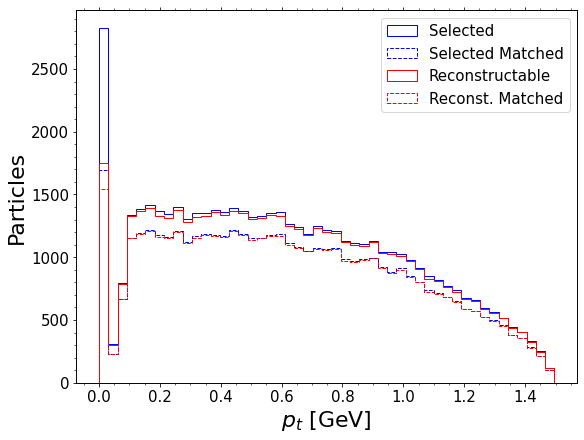

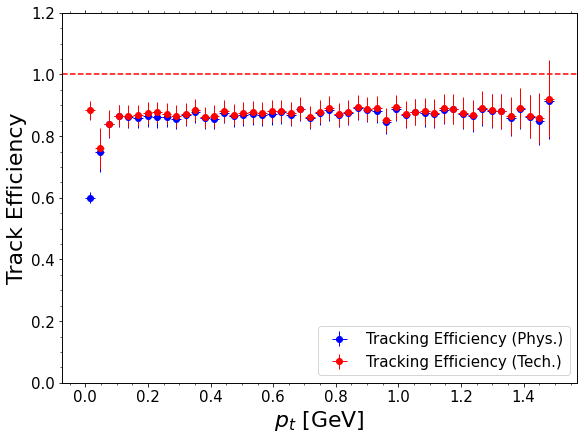

In [164]:
# vertex cuts
all_cuts = [0.0]

for cut_pt in all_cuts:
    print("cut_pt: {}".format(cut_pt))

    cuts = pt > cut_pt

    # make pt plots
    sel_particles = pt[cuts]  # selected/generated
    sel_matched_particles = pt[cuts & matched_idx]  # selected and matched
    reco_particles = pt[cuts & rectable_idx]  # selected and reconstructable
    reco_matched_particles = pt[
        cuts & rectable_idx & matched_idx
    ]  # selected, reconstructable and matched

    print("selected particles: ", sel_particles.shape[0])
    print("selected matched particles: ", sel_matched_particles.shape[0])
    print("efficiency (phys.): ", (sel_matched_particles.shape[0]/sel_particles.shape[0]*100))
    print("reconstructable particles: ", reco_particles.shape[0])
    print("reconstructable matched particles: ", reco_matched_particles.shape[0])
    print("efficiency (tech.): ", (reco_matched_particles.shape[0]/reco_particles.shape[0]*100))

    make_cmp_plot_fn(
        [sel_particles, sel_matched_particles, reco_particles, reco_matched_particles],
        configs=pt_configs,
        xlabel=r"$p_t$ [GeV]",
        outname=os.path.join(outdir, "{}_pt_cut{}".format(out_prefix, cut_pt)),
        ymin=0.0,
        loc="upper right",
    )

plt.axhline(y=1, color="r", linestyle="--")

## 2. Theta Angle

In [165]:
ptheta_min, ptheta_max = min(ptheta), max(ptheta)

# linear scale on x-axis
ptheta_bins = np.linspace(22, ptheta_max, num=20)

ptheta_configs = {"bins": ptheta_bins, "histtype": "step", "lw": 1, "log": False}

cut_ptheta: 0.0


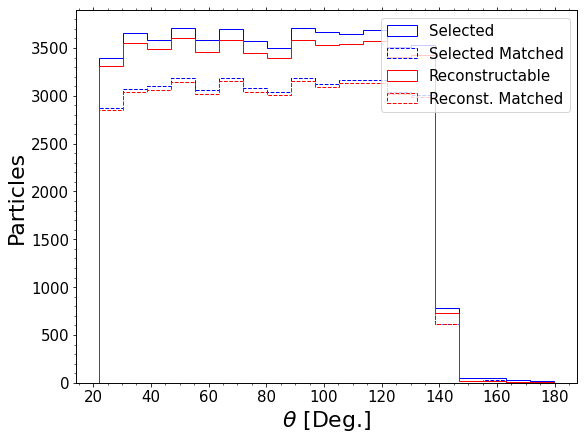

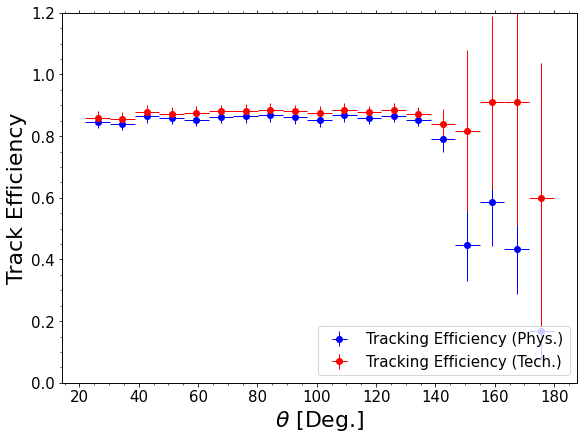

In [166]:
# vertex cuts
all_cuts = [0.0]

for cut_ptheta in all_cuts:
    print("cut_ptheta: {}".format(cut_ptheta))

    cuts = ptheta > cut_ptheta

    # make pt plots
    sel_particles = ptheta[cuts]  # selected/generated
    sel_matched_particles = ptheta[cuts & matched_idx]  # selected and matched
    reco_particles = ptheta[cuts & rectable_idx]  # selected and reconstructable
    reco_matched_particles = ptheta[
        cuts & rectable_idx & matched_idx
    ]  # selected, reconstructable and matched

    make_cmp_plot_fn(
        [sel_particles, sel_matched_particles, reco_particles, reco_matched_particles],
        configs=ptheta_configs,
        xlabel=r"$\theta$ [Deg.]",
        outname=os.path.join(outdir, "{}_ptheta_cut{}".format(out_prefix, cut_ptheta)),
        ymin=0.0,
        loc="upper right",
    )

## 3. Phi Angle

In [167]:
pphi_min, pphi_max = min(pphi), max(pphi)

# linear scale on x-axis
pphi_bins = np.linspace(-180, 180, num=15)

pphi_configs = {"bins": pphi_bins, "histtype": "step", "lw": 1, "log": False}

cut_pphi: -180


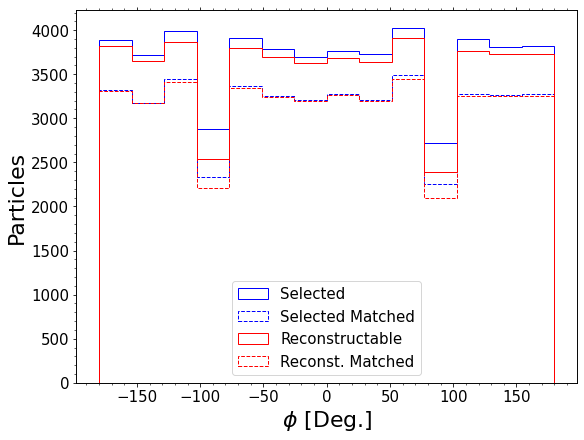

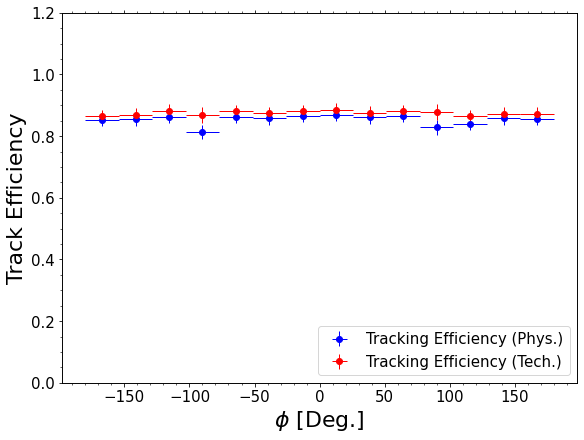

In [168]:
# vertex cuts
all_cuts = [-180]

for cut_pphi in all_cuts:
    print("cut_pphi: {}".format(cut_pphi))

    cuts = pphi > cut_pphi

    # make pt plots
    sel_particles = pphi[cuts]  # selected/generated
    sel_matched_particles = pphi[cuts & matched_idx]  # selected and matched
    reco_particles = pphi[cuts & rectable_idx]  # selected and reconstructable
    reco_matched_particles = pphi[
        cuts & rectable_idx & matched_idx
    ]  # selected, reconstructable and matched

    make_cmp_plot_fn(
        [sel_particles, sel_matched_particles, reco_particles, reco_matched_particles],
        configs=pphi_configs,
        xlabel=r"$\phi$ [Deg.]",
        outname=os.path.join(outdir, "{}_pphi_cut{}".format(out_prefix, cut_pphi)),
        ymin=0.0,
        loc="lower center",
    )

## 4. Decay Vertex

In [169]:
d0_min, d0_max = min(d0), max(d0)

# linear scale on x-axis
d0_bins = np.linspace(d0_min, 15, num=15)  # will give 15 bins

d0_configs = {"bins": d0_bins, "histtype": "step", "lw": 1, "log": False}

cut_d0: 0.0


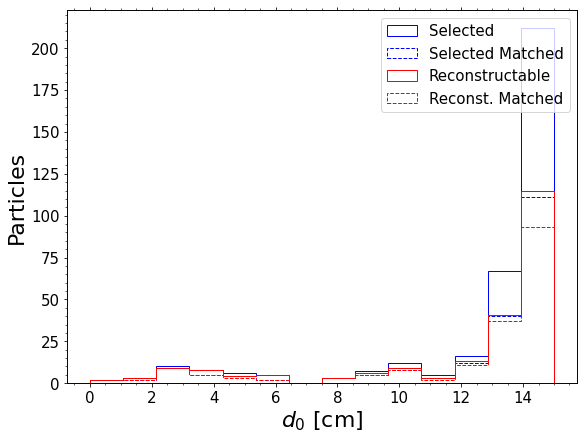

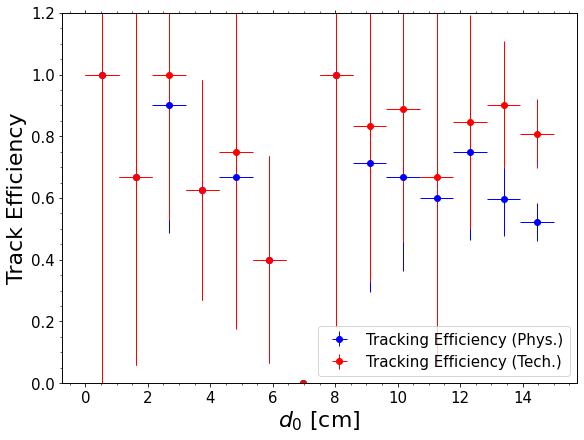

In [170]:
# vertex cuts
all_cuts = [0.0]

for cut_d0 in all_cuts:
    print("cut_d0: {}".format(cut_d0))

    cuts = d0 > cut_d0

    # make pt plots
    sel_particles = d0[cuts]  # selected/generated
    sel_matched_particles = d0[cuts & matched_idx]  # selected and matched
    reco_particles = d0[cuts & rectable_idx]  # selected and reconstructable
    reco_matched_particles = d0[
        cuts & rectable_idx & matched_idx
    ]  # selected, reconstructable and matched

    make_cmp_plot_fn(
        [sel_particles, sel_matched_particles, reco_particles, reco_matched_particles],
        configs=d0_configs,
        xlabel=r"$d_0$ [cm]",
        outname=os.path.join(outdir, "{}_d0_cut{}".format(out_prefix, cut_d0)),
        ymin=0.0,
        loc="upper right",
    )